Training accuracy of DecisionTreeClassifier() = 1.000
Testing accuracy of DecisionTreeClassifier() = 0.900
Training accuracy of RandomForestClassifier(max_features=2, max_leaf_nodes=3, min_samples_split=5) = 0.960
Testing accuracy of RandomForestClassifier(max_features=2, max_leaf_nodes=3, min_samples_split=5) = 0.920
Training accuracy of DecisionTreeClassifier(max_depth=1) = 0.680
Testing accuracy of DecisionTreeClassifier(max_depth=1) = 0.640
Training accuracy of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)) = 0.940
Testing accuracy of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)) = 0.920


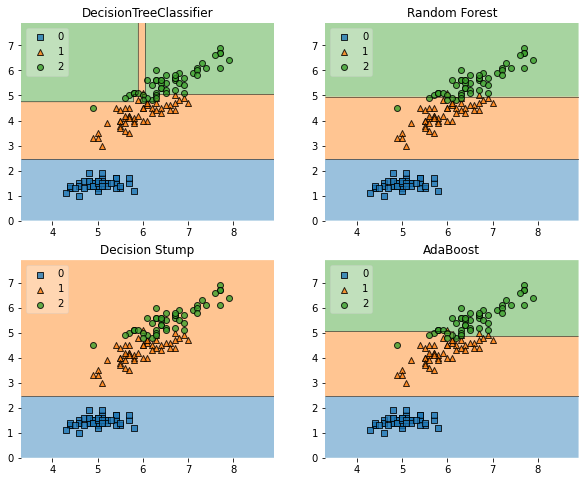

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
#to plot decision boundary import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.preprocessing import shuffle_arrays_unison

# Loading some example data
iris = load_iris()
X, y = iris.data[:, [0,2]], iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)
# split data into  training and validation set
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# define arrangement of subplots
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

labels = ['DecisionTreeClassifier', 'Random Forest', 'Decision Stump','AdaBoost']
for clf, lab, grd in zip([DecisionTreeClassifier(),RandomForestClassifier(100,max_features=2,max_leaf_nodes=3,min_samples_split=5)
                          ,DecisionTreeClassifier(max_depth=1),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))],labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    print('Training accuracy of %s = %.3f' % (clf, clf.score(X_train, y_train)))
    print('Testing accuracy of %s = %.3f' % (clf, clf.score(X_test,y_test)))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()